In [135]:
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import product
from utils import softmax

In [10]:
# Load BVC data

In [11]:
def heaviside_step(x):
    positive = np.greater(x, 0)
    x[~positive] = 0
    return x


def constrained_poisson_sample(lam, min_value, max_value):
    """Return a poisson sample within a constrained interval.

    :param float max_value: Maximum possible value.
    :param float min_value: Minimum possible value.
    :param int lam: Lambda parameter (average number of events).
    :return: A sample from a Poisson distribution within a constrained interval.
    """
    sample = max_value + 1
    while sample > max_value or sample < min_value:
        sample = np.random.poisson(lam)
    return sample



bvc_maps_folder = './Data/BVC_ratemaps/'


n_inputs = constrained_poisson_sample(8, 2, 16)
n_inputs = 5
pref_distances = np.random.choice([81.0, 169.0, 265.0, 369.0, 482.5, 606.5], n_inputs)
pref_orientations = np.random.choice(np.linspace(0, 360, 61)[:-1], n_inputs)

def compute_ratemap(self, env):
    input_activity = []
    for bvc in range(self.n_inputs):
        dist = pref_distances[bvc]
        orient = pref_orientations[bvc]
        fname = 'bvcmap_{}_distance{}_orientation{}.npy'.format('Square1x1', int(dist), int(orient))
        bvc_map = np.load(os.path.join(bvc_maps_folder, fname))
        input_activity.append(bvc_map)
    pc_activity = compute_activity(input_activity)
    return pc_activity

def compute_activity(self, input_activity):
    pc_activity = heaviside_step(np.power(np.prod(input_activity, axis=0), 1 / self.n_inputs))
    return pc_activity


In [63]:
maps = []
for d, o in zip(pref_distances, pref_orientations):
    fname = 'bvcmap_{}_distance{}_orientation{}.npy'.format('Square1x1', int(d), int(o))
    bvc_map = np.load(os.path.join(bvc_maps_folder, fname))
    maps.append(bvc_map)


TypeError: only size-1 arrays can be converted to Python scalars

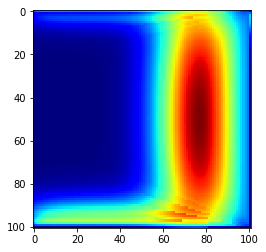

In [13]:
plt.imshow(maps[0], cmap=plt.cm.jet)

In [14]:
xs = np.arange(5, 1010, 10)
ys = np.arange(5, 1010, 10)
maps = np.array(maps)

In [15]:
rate_map = np.empty((len(xs), len(ys)))
for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        pos = np.array([x, y])
        activation = max(0, np.power(np.prod(maps[:,ix,iy]), 1/ len(maps)))
        rate_map[ix, iy] = activation


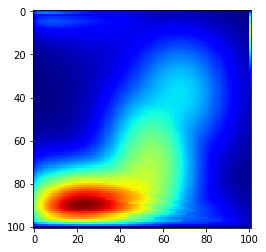

In [16]:
plt.imshow(rate_map, cmap=plt.cm.jet)

In [ ]:
# TODO: set up architecture for 20-50 place cells, each sampling randomly from 2-16 BVCs. 
# Add a softmax layer on top. 

In [109]:
distances = [81.0, 169.0, 265.0, 369.0, 482.5, 606.5]
orientations = np.linspace(0, 360, 61)[:-1]


def load_BVC_maps(distances, orientations):
    all_bvc_maps = {d:{} for d in distances}
    for d, o in product(distances, orientations):
        fname = 'bvcmap_{}_distance{}_orientation{}.npy'.format('Square1x1', int(d), int(o))
        bvc_map = np.load(os.path.join(bvc_maps_folder, fname))
        all_bvc_maps[d][o]= bvc_map
    return all_bvc_maps

In [110]:
all_bvc_maps = load_BVC_maps(distances,orientations)

In [ ]:
# index to location

In [113]:
n_place_cells = 20

n_inputs_per_pc = [constrained_poisson_sample(8, 2, 16) for _ in range(n_place_cells)]

pref_distances = [np.random.choice([81.0, 169.0, 265.0, 369.0, 482.5, 606.5], n) for n in n_inputs_per_pc]
pref_orientations = [np.random.choice(np.linspace(0, 360, 61)[:-1], n) for n in n_inputs_per_pc]

In [114]:
rate_map = np.empty((len(xs), len(ys)))
for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        activation = max(0, np.power(np.prod(maps[:,ix,iy]), 1/ len(maps)))
        rate_map[ix, iy] = activation

TypeError: list indices must be integers or slices, not tuple

In [115]:
# method should be: place cell class with attributes pref distnaces and pref orientations and
# method: compute input current. Then softmax over the place cell input current gives activation. 
# Do this first thing tomorrow!!!!!!!!

all_bvc_maps[81.0][0.0]

array([[1.15869575e-12, 1.16657439e-12, 1.17395739e-12, ...,
        3.99861870e-01, 4.93054325e-01, 2.27986487e-01],
       [2.04725759e-12, 2.06039400e-12, 2.07338490e-12, ...,
        4.98576392e-01, 5.90273311e-01, 3.76891290e-01],
       [3.60406719e-12, 3.62750264e-12, 3.65068773e-12, ...,
        5.50718397e-01, 6.16340382e-01, 4.27785527e-01],
       ...,
       [5.73365818e-01, 7.14913530e-01, 7.89680457e-01, ...,
        7.14913138e-01, 5.86524809e-01, 2.03395605e-12],
       [6.86851617e-01, 8.22282977e-01, 8.58595830e-01, ...,
        8.22282976e-01, 6.86851463e-01, 1.14842415e-12],
       [6.48569803e-13, 6.52615638e-13, 6.56617339e-13, ...,
        6.52615639e-13, 6.48569803e-13, 6.44481867e-13]])

In [144]:
class PlaceCell():
    def __init__(self):
        self.n_inputs = constrained_poisson_sample(8, 2, 16)
        self.bvc_idx = np.arange(self.n_inputs)
        self.pref_distances = np.random.choice([81.0, 169.0, 265.0, 369.0, 482.5, 606.5], self.n_inputs)
        self.pref_orientations = np.random.choice(np.linspace(0, 360, 61)[:-1], self.n_inputs)
        
    def get_input_current(self, ix, iy):
        input_vec = np.zeros(self.n_inputs)
        for i in self.bvc_idx:
            input_vec[i] = all_bvc_maps[self.pref_distances[i]][self.pref_orientations[i]][ix, iy]
        input_current = max(0, np.power(np.prod(input_vec), 1/ len(input_vec)))
        return input_current

In [156]:
pcs = [PlaceCell() for i in range(n_place_cells)]

In [159]:
rate_map = np.empty((len(pcs), len(xs), len(ys)))
for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        activation = [pc.get_input_current(ix, iy) for pc in pcs]
        activation = softmax(activation,beta=4)
        rate_map[:, ix, iy] = activation

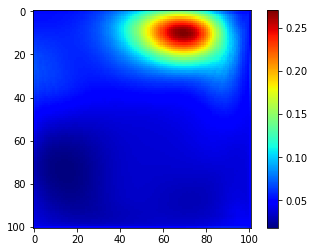

In [180]:
plt.imshow(rate_map[19],cmap=plt.cm.jet)
plt.colorbar()